In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Load datasets from CSV ----
df_fake = pd.read_csv("Fake.csv")   # Fake news
df_real = pd.read_csv("True.csv")   # Real news

# ---- Add labels ----
df_fake['label'] = "FAKE"
df_real['label'] = "REAL"

In [2]:
pd.read_csv("Fake.csv")
pd.read_csv("True.csv")

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


#### My part Data preparation


#### Class Distribution Analysis

Before training the model, it is important to examine the distribution of the target classes. An imbalanced dataset e.g., 90% FAKE and 10% TRUE could bias the model toward the majority class, resulting in misleading accuracy and poor generalization. Ensuring balance is therefore critical for fair and reliable predictions.

1. Raw Class Counts


In [4]:
data['label'].value_counts()


label
FAKE    23481
REAL    21417
Name: count, dtype: int64

The dataset contains 23,481 fake news articles and 21,417 true news articles.This results in a total of 44,898 articles.

FAKE : 23,481  (~52.3%)
TRUE : 21,417  (~47.7%)

2. Percentage Distribution

In [5]:
data['label'].value_counts(normalize=True) * 100


label
FAKE    52.298543
REAL    47.701457
Name: proportion, dtype: float64



When converted into percentages, the class proportions are:

FAKE → 52.3%

TRUE → 47.7%

This shows that the dataset is almost evenly balanced, with only a slight skew toward fake article


3. Visualization


C:\Users\user\AppData\Local\Temp\ipykernel_9456\2253211797.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


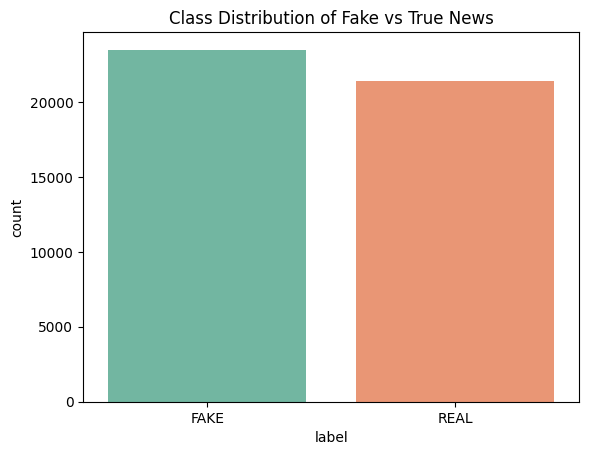

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=data, palette='Set2')
plt.title("Class Distribution of Fake vs True News")
plt.show()



A bar plot of the distribution highlights the balance:

Both bars (FAKE vs TRUE) are nearly equal in height.

There is no severe dominance of one class over the other.


4. Why Class Balance Matters

The class distribution is critical for machine learning classification tasks:

If the dataset was heavily imbalanced e.g. 90% TRUE vs 10% FAKE, a model could achieve 90% accuracy by always predicting TRUE, but such a model would be useless in practice.

Here, with a ~52/48 split, the baseline accuracy of random guessing is close to 50%, meaning our models must perform significantly better than chance to be useful.

5. Implications for Modeling

Since the dataset is balanced, we can proceed with standard train/test splitting without needing resampling techniques like SMOTE Synthetic Minority Oversampling Technique or undersampling.

Evaluation metrics such as Accuracy, Precision, Recall, and F1-score will be meaningful, because neither class is underrepresented.

Models won’t need special handling like class_weight='balanced' at this stage, though testing it may still be worthwhile later.



✅ Conclusion

The Fake News dataset provides a balanced distribution of FAKE and TRUE articles. This balance ensures that classification models trained on this data will not inherently favor one label over the other, allowing for a fair and unbiased evaluation of algorithm performance.

The slight overrepresentation of fake articles (~52%) may even be beneficial, as catching fake news (recall for FAKE) is often more critical in real-world applications than misclassifying a small portion of true news.